# <img style="float: left; padding: 0px 10px 0px 0px;" src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/84/Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg/1920px-Escudo_de_la_Pontificia_Universidad_Cat%C3%B3lica_de_Chile.svg.png"  width="80" /> MDS2030 - Introducción a Ciencia de Datos
**Pontificia Universidad Católica de Chile**<br>
**Magister en Ciencia de Datos**<br>

# Tutorial 2: Extracción de datos desde una API.

Este tutorial tiene com objetivo demostrar el uso de la librería `requests` para hacer consultas y recibir respuestas de una API, con el fin de extraer conjuntos de datos disponibles en plataformas online.

Como referencia, se sugiere revisar la documentación de la librería `requests`, disponible en el siguiente link:

https://requests.readthedocs.io/en/latest/


- **Nota:** Este Notebook está disponible como lectura Obligatoria de la semana.


## Ejemplo 1: API del Banco Mundial (World Bank)

La API de indicadores del Banco Mundial provee acceso programático a cerca de 16,000 series de tiempo de indicadores disponibles en plataformas online como Databank (https://databank.worldbank.org/). Muchas series de tiempo llegan hasta más de 50 años atrás, y pueden ser usadas para crear aplicaciones y análisis interesantes.

La información general de la API del Banco Mundial está diponible en este link:

https://datahelpdesk.worldbank.org/knowledgebase/articles/889392-about-the-indicators-api-documentation

Y en particular, las isntrucciones para consultar la API están acá:

https://datahelpdesk.worldbank.org/knowledgebase/articles/898581


Primero veamos como extrar el listado de todos los datos de la API Country, en formato JSON.

In [1]:
import requests
import pandas as pd

url='http://api.worldbank.org/v2/country'

In [2]:
# Primero veamos el caso de una query general, sin definir parámetros.
response=requests.get(url)
response.content

b'\xef\xbb\xbf<?xml version="1.0" encoding="utf-8"?>\r\n<wb:countries page="1" pages="6" per_page="50" total="299" xmlns:wb="http://www.worldbank.org">\r\n  <wb:country id="ABW">\r\n    <wb:iso2Code>AW</wb:iso2Code>\r\n    <wb:name>Aruba</wb:name>\r\n    <wb:region id="LCN" iso2code="ZJ">Latin America &amp; Caribbean </wb:region>\r\n    <wb:adminregion id="" iso2code="" />\r\n    <wb:incomeLevel id="HIC" iso2code="XD">High income</wb:incomeLevel>\r\n    <wb:lendingType id="LNX" iso2code="XX">Not classified</wb:lendingType>\r\n    <wb:capitalCity>Oranjestad</wb:capitalCity>\r\n    <wb:longitude>-70.0167</wb:longitude>\r\n    <wb:latitude>12.5167</wb:latitude>\r\n  </wb:country>\r\n  <wb:country id="AFE">\r\n    <wb:iso2Code>ZH</wb:iso2Code>\r\n    <wb:name>Africa Eastern and Southern</wb:name>\r\n    <wb:region id="NA" iso2code="NA">Aggregates</wb:region>\r\n    <wb:adminregion id="" iso2code="" />\r\n    <wb:incomeLevel id="NA" iso2code="NA">Aggregates</wb:incomeLevel>\r\n    <wb:lendi

Por defecto, la API entrega resultados en formato XML. Para obtenerlos en formato JSON, es necesario especificar
el parámetro `format`

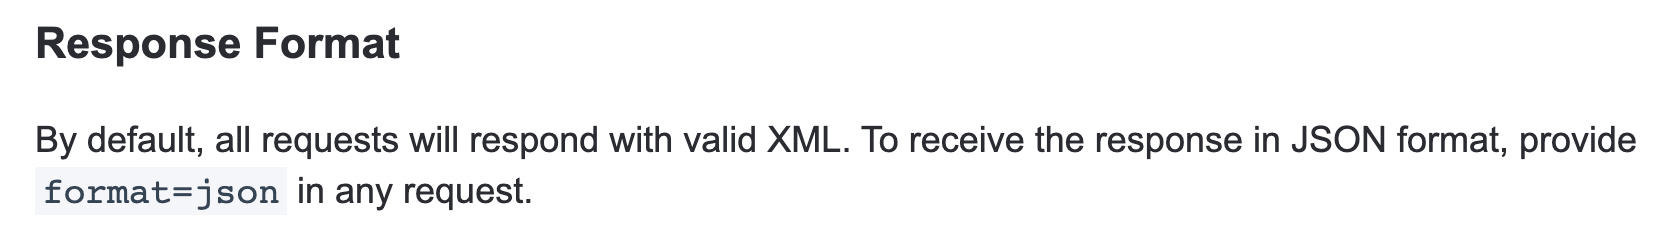

In [3]:
#Por defecto, la API entrega resultados en formato XML. Para obtenerlos en formato JSON, es necesario especificar
#el parámetro 'format'

response=requests.get(url,params={'format':'json'})
response.content

b'[{"page":1,"pages":6,"per_page":"50","total":299},[{"id":"ABW","iso2Code":"AW","name":"Aruba","region":{"id":"LCN","iso2code":"ZJ","value":"Latin America & Caribbean "},"adminregion":{"id":"","iso2code":"","value":""},"incomeLevel":{"id":"HIC","iso2code":"XD","value":"High income"},"lendingType":{"id":"LNX","iso2code":"XX","value":"Not classified"},"capitalCity":"Oranjestad","longitude":"-70.0167","latitude":"12.5167"},{"id":"AFE","iso2Code":"ZH","name":"Africa Eastern and Southern","region":{"id":"NA","iso2code":"NA","value":"Aggregates"},"adminregion":{"id":"","iso2code":"","value":""},"incomeLevel":{"id":"NA","iso2code":"NA","value":"Aggregates"},"lendingType":{"id":"","iso2code":"","value":"Aggregates"},"capitalCity":"","longitude":"","latitude":""},{"id":"AFG","iso2Code":"AF","name":"Afghanistan","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2code":"8S","value":"South Asia"},"incomeLevel":{"id":"LIC","iso2code":"XM","value":"Low income"

In [4]:
#Otra opción: incluir parámetros directamente en el string url
url_query='http://api.worldbank.org/v2/country?format=json'
response=requests.get(url_query)
response.content

b'[{"page":1,"pages":6,"per_page":"50","total":299},[{"id":"ABW","iso2Code":"AW","name":"Aruba","region":{"id":"LCN","iso2code":"ZJ","value":"Latin America & Caribbean "},"adminregion":{"id":"","iso2code":"","value":""},"incomeLevel":{"id":"HIC","iso2code":"XD","value":"High income"},"lendingType":{"id":"LNX","iso2code":"XX","value":"Not classified"},"capitalCity":"Oranjestad","longitude":"-70.0167","latitude":"12.5167"},{"id":"AFE","iso2Code":"ZH","name":"Africa Eastern and Southern","region":{"id":"NA","iso2code":"NA","value":"Aggregates"},"adminregion":{"id":"","iso2code":"","value":""},"incomeLevel":{"id":"NA","iso2code":"NA","value":"Aggregates"},"lendingType":{"id":"","iso2code":"","value":"Aggregates"},"capitalCity":"","longitude":"","latitude":""},{"id":"AFG","iso2Code":"AF","name":"Afghanistan","region":{"id":"SAS","iso2code":"8S","value":"South Asia"},"adminregion":{"id":"SAS","iso2code":"8S","value":"South Asia"},"incomeLevel":{"id":"LIC","iso2code":"XM","value":"Low income"

Inspeccionemos ahora el contenido de la respuesta:

In [5]:
json=response.json()
json

[{'page': 1, 'pages': 6, 'per_page': '50', 'total': 299},
 [{'id': 'ABW',
   'iso2Code': 'AW',
   'name': 'Aruba',
   'region': {'id': 'LCN',
    'iso2code': 'ZJ',
    'value': 'Latin America & Caribbean '},
   'adminregion': {'id': '', 'iso2code': '', 'value': ''},
   'incomeLevel': {'id': 'HIC', 'iso2code': 'XD', 'value': 'High income'},
   'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'},
   'capitalCity': 'Oranjestad',
   'longitude': '-70.0167',
   'latitude': '12.5167'},
  {'id': 'AFE',
   'iso2Code': 'ZH',
   'name': 'Africa Eastern and Southern',
   'region': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'},
   'adminregion': {'id': '', 'iso2code': '', 'value': ''},
   'incomeLevel': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'},
   'lendingType': {'id': '', 'iso2code': '', 'value': 'Aggregates'},
   'capitalCity': '',
   'longitude': '',
   'latitude': ''},
  {'id': 'AFG',
   'iso2Code': 'AF',
   'name': 'Afghanistan',
   'region': {'id': 

In [6]:
json[0]

{'page': 1, 'pages': 6, 'per_page': '50', 'total': 299}

La respuesta de la API es una lista de diccionarios. El primero de ellos contiene información general de los datos, y el segundo contiene los datos de interés relativos a países.

In [7]:
json[1]

[{'id': 'ABW',
  'iso2Code': 'AW',
  'name': 'Aruba',
  'region': {'id': 'LCN',
   'iso2code': 'ZJ',
   'value': 'Latin America & Caribbean '},
  'adminregion': {'id': '', 'iso2code': '', 'value': ''},
  'incomeLevel': {'id': 'HIC', 'iso2code': 'XD', 'value': 'High income'},
  'lendingType': {'id': 'LNX', 'iso2code': 'XX', 'value': 'Not classified'},
  'capitalCity': 'Oranjestad',
  'longitude': '-70.0167',
  'latitude': '12.5167'},
 {'id': 'AFE',
  'iso2Code': 'ZH',
  'name': 'Africa Eastern and Southern',
  'region': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'},
  'adminregion': {'id': '', 'iso2code': '', 'value': ''},
  'incomeLevel': {'id': 'NA', 'iso2code': 'NA', 'value': 'Aggregates'},
  'lendingType': {'id': '', 'iso2code': '', 'value': 'Aggregates'},
  'capitalCity': '',
  'longitude': '',
  'latitude': ''},
 {'id': 'AFG',
  'iso2Code': 'AF',
  'name': 'Afghanistan',
  'region': {'id': 'SAS', 'iso2code': '8S', 'value': 'South Asia'},
  'adminregion': {'id': 'SAS', 'iso

In [8]:
#Podemos llevar estos datos a un DataFrame de pandas
df=pd.DataFrame(json[1])
df

,id,iso2Code,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,"{'id': 'LCN', 'iso2code': 'ZJ', 'value': 'Lati...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
2,AFG,AF,Afghanistan,"{'id': 'SAS', 'iso2code': '8S', 'value': 'Sout...","{'id': 'SAS', 'iso2code': '8S', 'value': 'Sout...","{'id': 'LIC', 'iso2code': 'XM', 'value': 'Low ...","{'id': 'IDX', 'iso2code': 'XI', 'value': 'IDA'}",Kabul,69.1761,34.5228
3,AFR,A9,Africa,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
4,AFW,ZI,Africa Western and Central,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
5,AGO,AO,Angola,"{'id': 'SSF', 'iso2code': 'ZG', 'value': 'Sub-...","{'id': 'SSA', 'iso2code': 'ZF', 'value': 'Sub-...","{'id': 'LMC', 'iso2code': 'XN', 'value': 'Lowe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Luanda,13.242,-8.81155
6,ALB,AL,Albania,"{'id': 'ECS', 'iso2code': 'Z7', 'value': 'Euro...","{'id': 'ECA', 'iso2code': '7E', 'value': 'Euro...","{'id': 'UMC', 'iso2code': 'XT', 'value': 'Uppe...","{'id': 'IBD', 'iso2code': 'XF', 'value': 'IBRD'}",Tirane,19.8172,41.3317
7,AND,AD,Andorra,"{'id': 'ECS', 'iso2code': 'Z7', 'value': 'Euro...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Andorra la Vella,1.5218,42.5075
8,ARB,1A,Arab World,"{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'NA', 'iso2code': 'NA', 'value': 'Aggre...","{'id': '', 'iso2code': '', 'value': 'Aggregates'}",,,
9,ARE,AE,United Arab Emirates,"{'id': 'MEA', 'iso2code': 'ZQ', 'value': 'Midd...","{'id': '', 'iso2code': '', 'value': ''}","{'id': 'HIC', 'iso2code': 'XD', 'value': 'High...","{'id': 'LNX', 'iso2code': 'XX', 'value': 'Not ...",Abu Dhabi,54.3705,24.4764


Dado que los datos contienen diccionarios anidados, es necesario usar la función `json_normalize`para generar un DataFrame aplanado.

In [9]:
df=pd.json_normalize(json[1])
df

,id,iso2Code,name,capitalCity,longitude,latitude,region.id,region.iso2code,region.value,adminregion.id,adminregion.iso2code,adminregion.value,incomeLevel.id,incomeLevel.iso2code,incomeLevel.value,lendingType.id,lendingType.iso2code,lendingType.value
0,ABW,AW,Aruba,Oranjestad,-70.0167,12.5167,LCN,ZJ,Latin America & Caribbean,,,,HIC,XD,High income,LNX,XX,Not classified
1,AFE,ZH,Africa Eastern and Southern,,,,NA,NA,Aggregates,,,,NA,NA,Aggregates,,,Aggregates
2,AFG,AF,Afghanistan,Kabul,69.1761,34.5228,SAS,8S,South Asia,SAS,8S,South Asia,LIC,XM,Low income,IDX,XI,IDA
3,AFR,A9,Africa,,,,NA,NA,Aggregates,,,,NA,NA,Aggregates,,,Aggregates
4,AFW,ZI,Africa Western and Central,,,,NA,NA,Aggregates,,,,NA,NA,Aggregates,,,Aggregates
5,AGO,AO,Angola,Luanda,13.242,-8.81155,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LMC,XN,Lower middle income,IBD,XF,IBRD
6,ALB,AL,Albania,Tirane,19.8172,41.3317,ECS,Z7,Europe & Central Asia,ECA,7E,Europe & Central Asia (excluding high income),UMC,XT,Upper middle income,IBD,XF,IBRD
7,AND,AD,Andorra,Andorra la Vella,1.5218,42.5075,ECS,Z7,Europe & Central Asia,,,,HIC,XD,High income,LNX,XX,Not classified
8,ARB,1A,Arab World,,,,NA,NA,Aggregates,,,,NA,NA,Aggregates,,,Aggregates
9,ARE,AE,United Arab Emirates,Abu Dhabi,54.3705,24.4764,MEA,ZQ,Middle East & North Africa,,,,HIC,XD,High income,LNX,XX,Not classified


Podemos repetir el ejercicio completo para una consulta más específica, por ejemplo, solicitando sólo la información de los países de bajo nivel de ingresos (Low Income Country). De acuerdo a la documentación de la API, esto requiere definir el parámetro `incomeLevel=LIC`

In [10]:
response=requests.get(url,params={'format':'json','incomeLevel':'LIC'})
json=response.json()
df2=pd.json_normalize(json[1])
df2.head(10)

,id,iso2Code,name,capitalCity,longitude,latitude,region.id,region.iso2code,region.value,adminregion.id,adminregion.iso2code,adminregion.value,incomeLevel.id,incomeLevel.iso2code,incomeLevel.value,lendingType.id,lendingType.iso2code,lendingType.value
0,AFG,AF,Afghanistan,Kabul,69.1761,34.5228,SAS,8S,South Asia,SAS,8S,South Asia,LIC,XM,Low income,IDX,XI,IDA
1,BDI,BI,Burundi,Bujumbura,29.3639,-3.3784,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LIC,XM,Low income,IDX,XI,IDA
2,BFA,BF,Burkina Faso,Ouagadougou,-1.53395,12.3605,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LIC,XM,Low income,IDX,XI,IDA
3,CAF,CF,Central African Republic,Bangui,21.6407,5.63056,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LIC,XM,Low income,IDX,XI,IDA
4,COD,CD,"Congo, Dem. Rep.",Kinshasa,15.3222,-4.325,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LIC,XM,Low income,IDX,XI,IDA
5,ERI,ER,Eritrea,Asmara,38.9183,15.3315,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LIC,XM,Low income,IDX,XI,IDA
6,ETH,ET,Ethiopia,Addis Ababa,38.7468,9.02274,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LIC,XM,Low income,IDX,XI,IDA
7,GIN,GN,Guinea,Conakry,-13.7,9.51667,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LIC,XM,Low income,IDX,XI,IDA
8,GMB,GM,"Gambia, The",Banjul,-16.5885,13.4495,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LIC,XM,Low income,IDX,XI,IDA
9,GNB,GW,Guinea-Bissau,Bissau,-15.1804,11.8037,SSF,ZG,Sub-Saharan Africa,SSA,ZF,Sub-Saharan Africa (excluding high income),LIC,XM,Low income,IDX,XI,IDA


## Ejemplo 2: API Yelp Fusion ¿Dónde puedo comer en Santiago?

La aplicación Yelp permite a los usuarios calificar y enviar comentarios sobre distintos negocios, y disponibiliza esta información mediante un conjunto de APIs.

https://www.yelp.com/developers/documentation/v3/get_started

Para conectarse a estas APIs, se requiere una clave privada de autentificación (gratuita), que puede ser creada siguiendo las instrucciones en:

https://www.yelp.com/developers/documentation/v3/authentication

En esje ejmplo, usaremos la API *Businesses Search* para obtenre un listado de restaurants en la ciudad de Santiago. La información requerida para hacer la búsqueda está disponible en:

https://www.yelp.com/developers/documentation/v3/business_search

Una característica importante de la API, es que entrega un **máximo de 1000 resultados**. Además, cada query tiene un límite de 50 resultados. Por lo tanto, es necesario **iterar y realizar varias queries para obtener el máximo de 1000 registros**. Para esto, se utiliza el parámetro `offset`, que permite ir avanzando en la lista.

In [11]:
#url de la API
api_url='https://api.yelp.com/v3/businesses/search'

#estos datos corresponden a una cuenta de usuario creada previamente
clientid='GWOCZh9-BmZxtdsAjr7Gug'
apikey='FHVvXoNmTXIl9DuxYis7AV5uLPujm9MLwrhgs5NgvCfaOxd3V6mxt6dQU8eEqYJiGxe816XATx7ufWjbMWqbV-2Uku1jxBJv8BGRC74NroLPl27PDQqs0tDixit-YHYx'
headers={'Authorization':'Bearer %s'%apikey}

In [12]:
params={'term':'restaurants','location':'RM Santiago, Chile','limit':50}
response=requests.get(api_url,params=params,headers=headers)
data=response.json()
data

{'businesses': [{'id': '8N6Y3HsLXHBeFwhlO0YxwQ',
   'alias': 'barrica-94-santiago',
   'name': 'Barrica 94',
   'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/nuJaODltnNB6J_ww3g-JyA/o.jpg',
   'is_closed': False,
   'url': 'https://www.yelp.com/biz/barrica-94-santiago?adjust_creative=GWOCZh9-BmZxtdsAjr7Gug&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GWOCZh9-BmZxtdsAjr7Gug',
   'review_count': 75,
   'categories': [{'alias': 'wine_bars', 'title': 'Wine Bars'},
    {'alias': 'chilean', 'title': 'Chilean'},
    {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
   'rating': 4.5,
   'coordinates': {'latitude': -33.4342880070125,
    'longitude': -70.6352240592241},
   'transactions': [],
   'price': '$$',
   'location': {'address1': 'Bellavista 052',
    'address2': '',
    'address3': '',
    'city': 'Santiago',
    'zip_code': '8320000',
    'country': 'CL',
    'state': 'RM',
    'display_address': ['Bellavista 052', 'RM 8320000 Santiago', 'Chile']},


In [13]:
#Veamos los keys del diccionario recibido
data.keys()

dict_keys(['businesses', 'total', 'region'])

In [14]:
#El primer elemento del diccionario indica el total de restaurants existentes en la API
print('En total la base de datos registra %d restaurants'%data['total'])

En total la base de datos registra 2300 restaurants


In [15]:
data['businesses']

[{'id': '8N6Y3HsLXHBeFwhlO0YxwQ',
  'alias': 'barrica-94-santiago',
  'name': 'Barrica 94',
  'image_url': 'https://s3-media2.fl.yelpcdn.com/bphoto/nuJaODltnNB6J_ww3g-JyA/o.jpg',
  'is_closed': False,
  'url': 'https://www.yelp.com/biz/barrica-94-santiago?adjust_creative=GWOCZh9-BmZxtdsAjr7Gug&utm_campaign=yelp_api_v3&utm_medium=api_v3_business_search&utm_source=GWOCZh9-BmZxtdsAjr7Gug',
  'review_count': 75,
  'categories': [{'alias': 'wine_bars', 'title': 'Wine Bars'},
   {'alias': 'chilean', 'title': 'Chilean'},
   {'alias': 'cocktailbars', 'title': 'Cocktail Bars'}],
  'rating': 4.5,
  'coordinates': {'latitude': -33.4342880070125,
   'longitude': -70.6352240592241},
  'transactions': [],
  'price': '$$',
  'location': {'address1': 'Bellavista 052',
   'address2': '',
   'address3': '',
   'city': 'Santiago',
   'zip_code': '8320000',
   'country': 'CL',
   'state': 'RM',
   'display_address': ['Bellavista 052', 'RM 8320000 Santiago', 'Chile']},
  'phone': '+5627324939',
  'display_

La data entregada por la API Yelp API es un objeto en formato JSON anidado, es decir, un diccionario donde algunos de los valores de atributos corresponden a su vez a listas o diccionarios.

Como vimos anteriormente, podemos llevar estos datos a un formato "aplanado" o "flattened",utilizando la función `json_normalize()` :

https://pandas.pydata.org/docs/reference/api/pandas.json_normalize.html

In [16]:
#normalizamos el contenido del diccionario "businesses"
rests = pd.json_normalize(data["businesses"],sep='_',record_path=['categories'],meta=['name','price','rating','review_count','distance',['coordinates','latitude'],['coordinates','longitude'],['location','address1']],errors='ignore')
rests.head()

,alias,title,name,price,rating,review_count,distance,coordinates_latitude,coordinates_longitude,location_address1
0,wine_bars,Wine Bars,Barrica 94,$$,4.5,75,1390.184857,-33.434288,-70.635224,Bellavista 052
1,chilean,Chilean,Barrica 94,$$,4.5,75,1390.184857,-33.434288,-70.635224,Bellavista 052
2,cocktailbars,Cocktail Bars,Barrica 94,$$,4.5,75,1390.184857,-33.434288,-70.635224,Bellavista 052
3,seafood,Seafood,Aquí Está Coco,$$$$,4.5,54,2355.685975,-33.424063,-70.616624,La Concepción 236
4,chilean,Chilean,Mestizo,$$$$,4.5,53,6024.195625,-33.394083,-70.600033,Av. del Bicentenario 4050


La API cuenta con información relativa a 2300 restaurantes, pero en cada consulta se extrae una página con 50 resultados. Por lo tanto, para extraer todos los datos, será necesario iterar el proceso. El parámetro `offset` de la API indica el número de registros a avanzar en cada consulta (avanzamos de 50 en 50).

In [17]:
#iteramos
offset=0

#creamos una lista para reunir los dataframes creados para cada una de las consultas
allrests=[]

#iteramos hasta llegar a 1000 resultados (el máximo que permite la API)
while offset<=950:
    
    #parámetros de la consulta a la API
    params={'term':'restaurants','location':'RM Santiago, Chile','limit':50,'offset':offset}

    response=requests.get(api_url,params=params,headers=headers)
    data=response.json()
    
    #dataframe con 50 resultados
    rests = pd.json_normalize(data["businesses"],sep='_',record_path=['categories'],meta=['name','price','rating','review_count','distance',['coordinates','latitude'],['coordinates','longitude'],['location','address1']],errors='ignore')

    #agregamos este resultado a la lista de dataframes
    allrests.append(rests)
    
    #avanzamos 50 registros
    offset=offset+50
    

In [18]:
#Finalmente concatenamos todos los dataframes para crear uno solo con todos los resultados
rests=pd.concat(allrests,ignore_index=True)
rests

,alias,title,name,price,rating,review_count,distance,coordinates_latitude,coordinates_longitude,location_address1
0,wine_bars,Wine Bars,Barrica 94,$$,4.5,75,1390.184857,-33.434288,-70.635224,Bellavista 052
1,chilean,Chilean,Barrica 94,$$,4.5,75,1390.184857,-33.434288,-70.635224,Bellavista 052
2,cocktailbars,Cocktail Bars,Barrica 94,$$,4.5,75,1390.184857,-33.434288,-70.635224,Bellavista 052
3,seafood,Seafood,Aquí Está Coco,$$$$,4.5,54,2355.685975,-33.424063,-70.616624,La Concepción 236
4,chilean,Chilean,Mestizo,$$$$,4.5,53,6024.195625,-33.394083,-70.600033,Av. del Bicentenario 4050
...,...,...,...,...,...,...,...,...,...,...
1441,peruvian,Peruvian,Esperanto,$,3.0,1,3636.563454,-33.453665,-70.66301,Toesca 2021
1442,cafeteria,Cafeteria,Club Colombia,$$,4.0,1,1561.824568,-33.431003,-70.618879,Av. Manuel Montt 273
1443,colombian,Colombian,Club Colombia,$$,4.0,1,1561.824568,-33.431003,-70.618879,Av. Manuel Montt 273
1444,chilean,Chilean,La Zaranda,$$,3.5,2,2871.604307,-33.462395,-70.647184,Arturo Prat 1311
